<a href="https://colab.research.google.com/github/VitalyGladyshev/Python_for_DS/blob/master/%D0%93%D0%BB%D0%B0%D0%B4%D1%8B%D1%88%D0%B5%D0%B2%D0%92%D0%92_MATH_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,4311.219852,992.038414,2107.139414,3618.064513,4284.687348,5086.089761,6662.622385


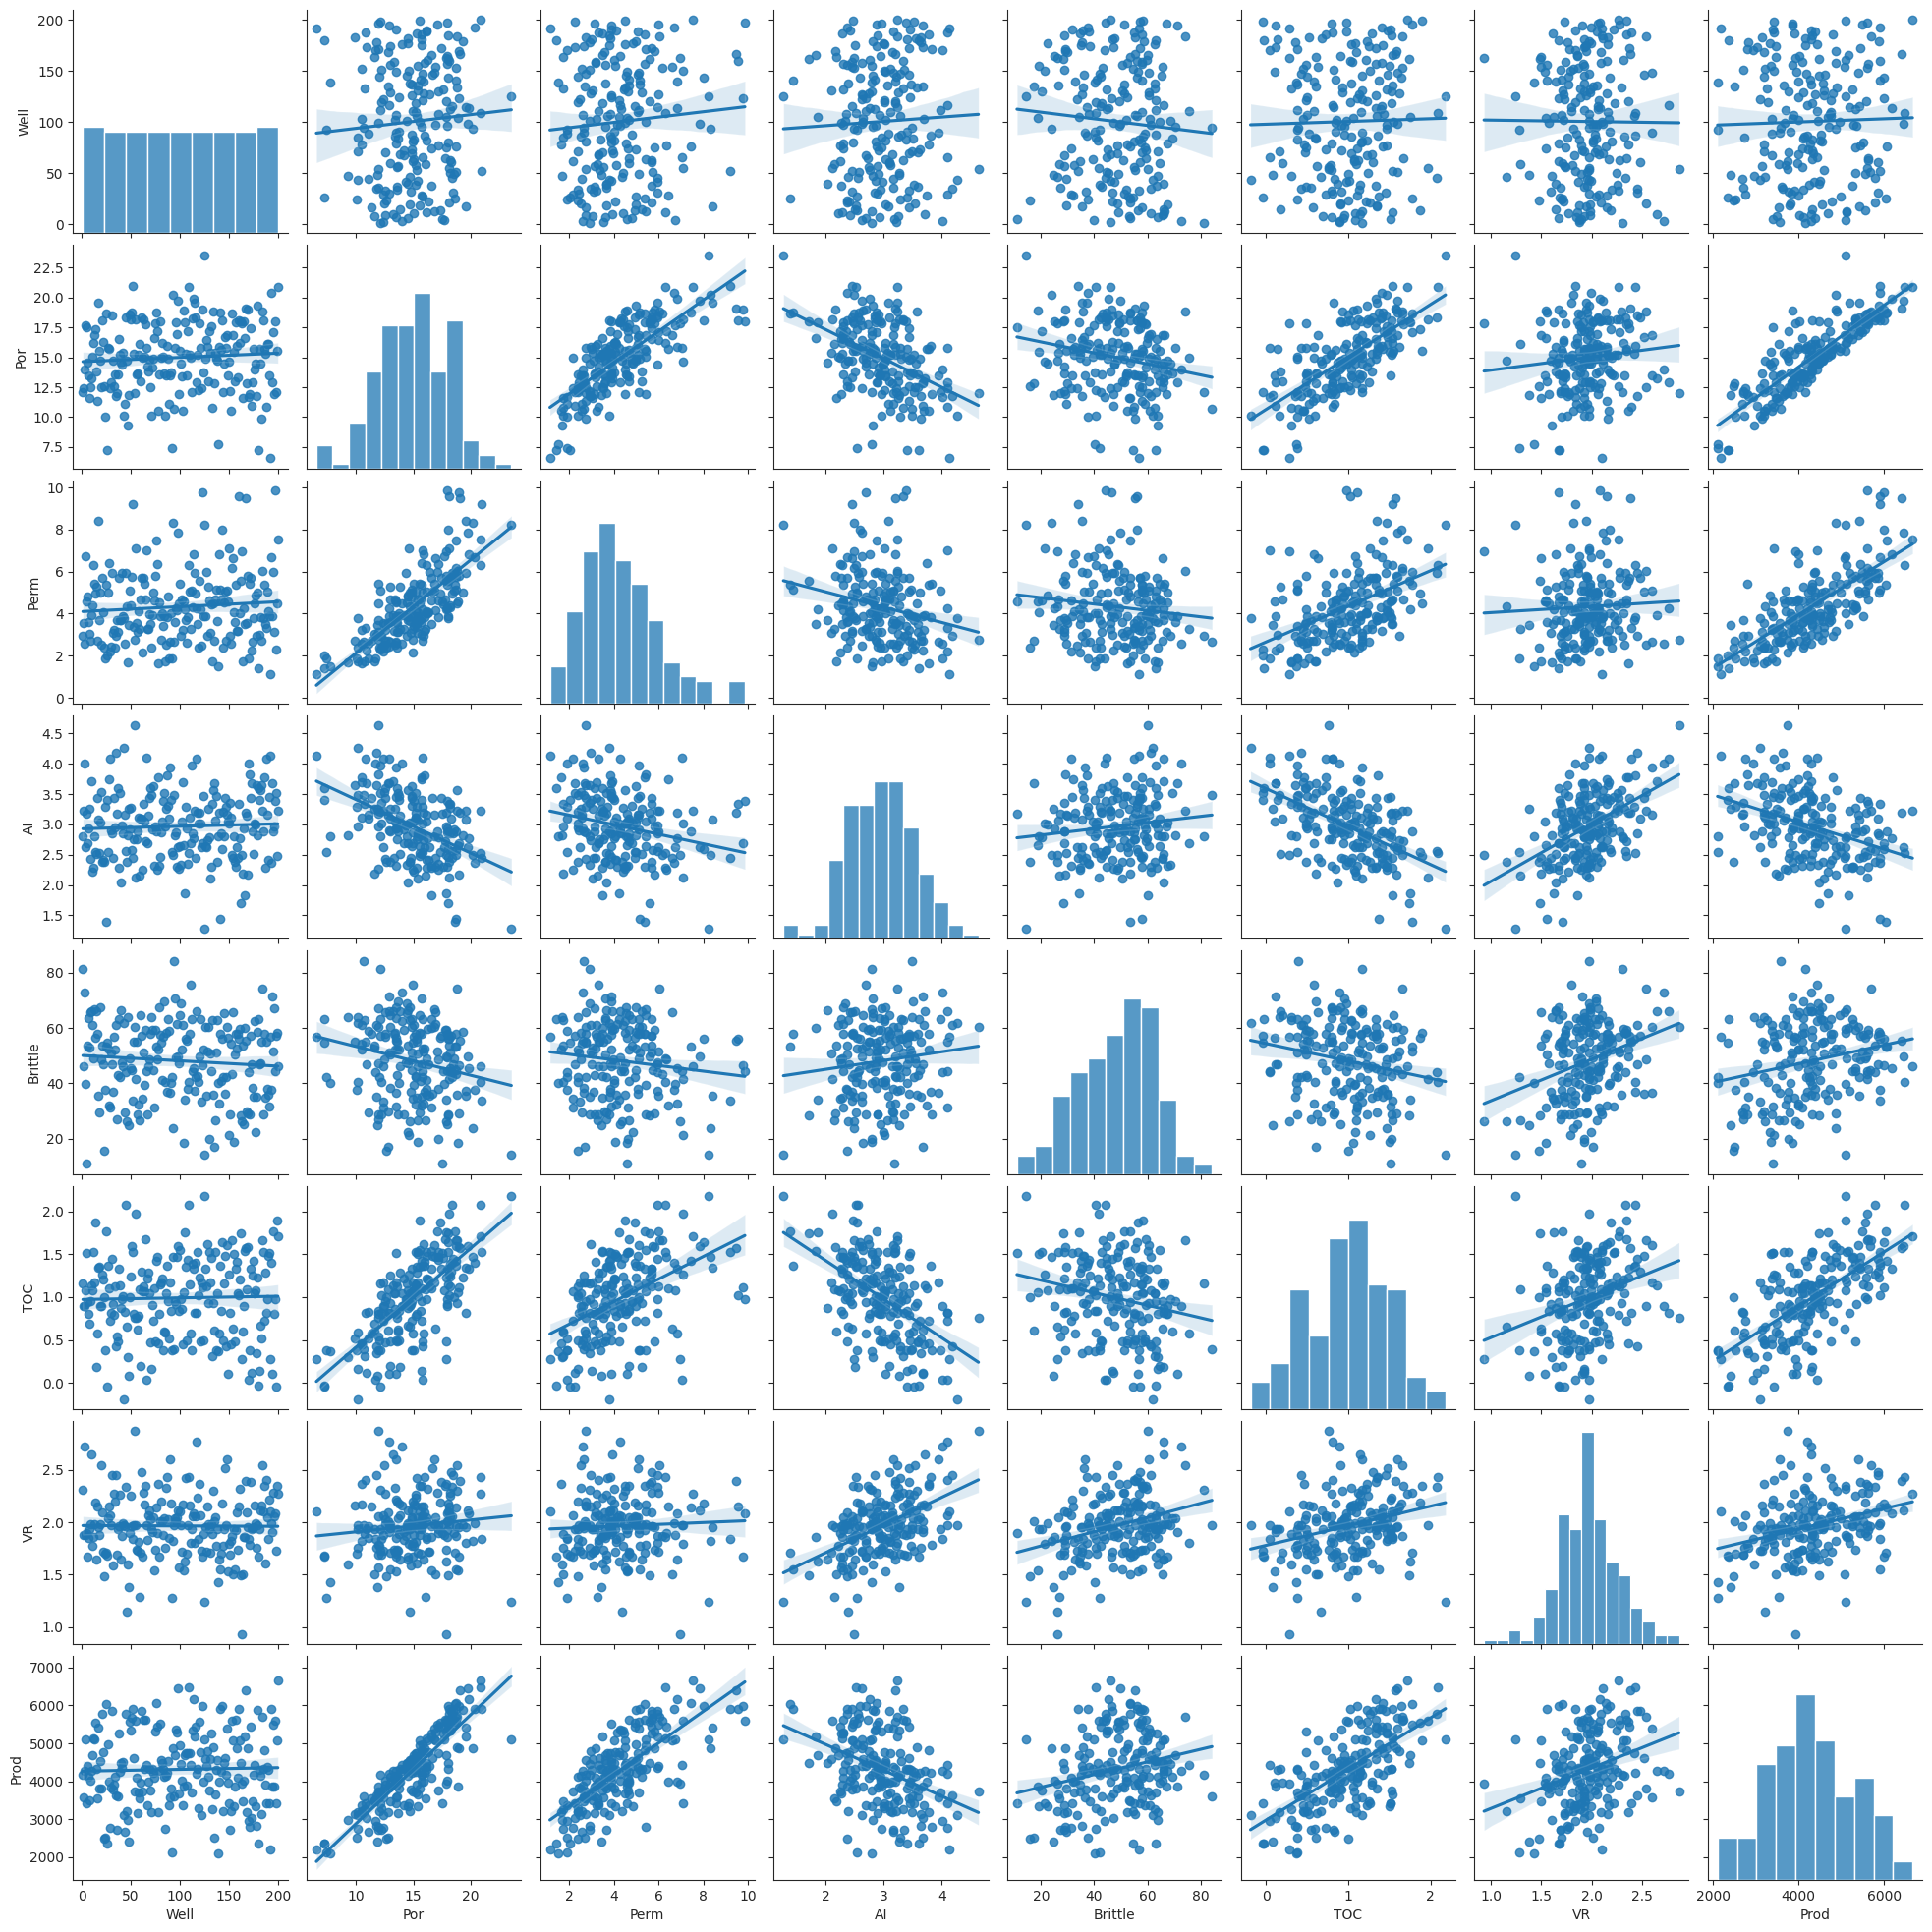

In [10]:
sns.set_style("ticks")
sns.pairplot(data, kind="reg")
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [12]:
data.corr(method='pearson')

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


<Axes: >

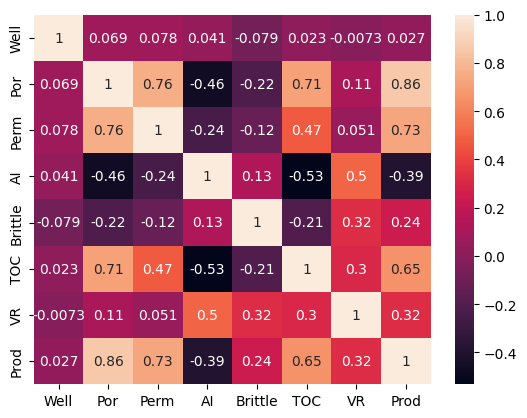

In [5]:
sns.heatmap(data.corr('pearson'), annot=True)

In [29]:
data.corr(method='pearson').values.round(3)

array([[ 1.   ,  0.069,  0.078,  0.041, -0.079,  0.023, -0.007,  0.027],
       [ 0.069,  1.   ,  0.761, -0.462, -0.219,  0.712,  0.112,  0.862],
       [ 0.078,  0.761,  1.   , -0.24 , -0.124,  0.472,  0.051,  0.727],
       [ 0.041, -0.462, -0.24 ,  1.   ,  0.128, -0.532,  0.499, -0.391],
       [-0.079, -0.219, -0.124,  0.128,  1.   , -0.214,  0.318,  0.237],
       [ 0.023,  0.712,  0.472, -0.532, -0.214,  1.   ,  0.299,  0.654],
       [-0.007,  0.112,  0.051,  0.499,  0.318,  0.299,  1.   ,  0.323],
       [ 0.027,  0.862,  0.727, -0.391,  0.237,  0.654,  0.323,  1.   ]])

In [90]:
cr = data.corr(method='pearson').values
cr[-1]

array([ 0.02681678,  0.86190954,  0.72742614, -0.39083477,  0.23715533,
        0.6544452 ,  0.32318155,  1.        ])

In [32]:
cr.shape

(8, 8)

In [33]:
np.linalg.matrix_rank(cr)

8

In [34]:
np.linalg.det(cr)

0.0007299388072652095

In [19]:
cr[-1]

array([ 0.027,  0.862,  0.727, -0.391,  0.237,  0.654,  0.323,  1.   ])

In [21]:
cr_m = data[['Por','Perm','TOC']].corr(method='pearson').values.round(3)
cr_m

array([[1.   , 0.761, 0.712],
       [0.761, 1.   , 0.472],
       [0.712, 0.472, 1.   ]])

<Axes: >

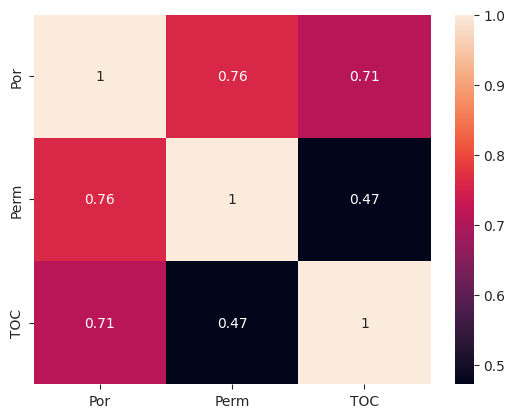

In [23]:
sns.heatmap(data[['Por','Perm','TOC']].corr(method='pearson'), annot=True)

* Какие факторы сильнее всего коррелируют с целевой переменной?

С целевой переменной сильнее всего коррелируют признаки: **Por, Perm, TOC**

* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

**Определитель морицы близок к нулю** т.к. признаки сильно коррелирующие с целевой переменной сильно коррелируют между собой

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?

Чистой коллинеарности в данных не выявлено <br>

**В данных присутствует мультиколлинеарность** т.к. признаки сильно коррелирующие с целевой переменной сильно коррелируют между собой

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

Для применения модели желательно снизить мультиколлинеарность в данных. Нужно произвести отбор признаков. Можно попробовать убрать признак Perm и, возможно, TOC

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [48]:
X = data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']].values
X[:3]

array([[ 1.  , 12.08,  2.92,  2.8 , 81.4 ,  1.16,  2.31],
       [ 2.  , 12.38,  3.53,  3.22, 46.17,  0.89,  1.88],
       [ 3.  , 14.02,  2.59,  4.01, 72.8 ,  0.89,  2.72]])

In [49]:
y = data[['Prod']].values
y[:3]

array([[4165.196191],
       [3561.146205],
       [4284.348574]])

In [50]:
X.shape, y.shape

((200, 7), (200, 1))

In [51]:
A = np.column_stack((np.ones(X.shape[0]), X))
A

array([[ 1.000e+00,  1.000e+00,  1.208e+01, ...,  8.140e+01,  1.160e+00,
         2.310e+00],
       [ 1.000e+00,  2.000e+00,  1.238e+01, ...,  4.617e+01,  8.900e-01,
         1.880e+00],
       [ 1.000e+00,  3.000e+00,  1.402e+01, ...,  7.280e+01,  8.900e-01,
         2.720e+00],
       ...,
       [ 1.000e+00,  1.980e+02,  1.212e+01, ...,  5.707e+01, -4.000e-02,
         1.730e+00],
       [ 1.000e+00,  1.990e+02,  1.555e+01, ...,  5.825e+01,  1.890e+00,
         2.350e+00],
       [ 1.000e+00,  2.000e+02,  2.089e+01, ...,  4.617e+01,  1.710e+00,
         2.270e+00]])

In [54]:
w_hat = np.linalg.inv(A.T@A)@A.T@y
w_hat

array([[-1.23230803e+03],
       [ 5.07003631e-02],
       [ 2.30179140e+02],
       [ 1.16239006e+02],
       [-3.65202301e+02],
       [ 2.49943700e+01],
       [-7.84009294e+01],
       [ 7.85259815e+02]])

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

model.fit(A, y)
print('model.coef_:', model.coef_)

model.coef_: [[-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
  -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]]


In [57]:
w_hat.round()

array([[-1232.],
       [    0.],
       [  230.],
       [  116.],
       [ -365.],
       [   25.],
       [  -78.],
       [  785.]])

* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?

Признак **Well не коррелирует** с целевой переменной и по существу является набором id. Если бы не текст задания я убрал бы его сразу. Признаки Brittle и VR  тоже слабо коррелируют с целевой переменной, онако возможность их удаления необходимо оценить дополнительно.

* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.

Интерпретация коэффициентов затруднена отсутствием нормализации

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [62]:
new_oil_well = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
new_oil_well

{'Well': 106.0,
 'Por': 15.32,
 'Perm': 3.71,
 'AI': 3.29,
 'Brittle': 55.99,
 'TOC': 1.35,
 'VR': 2.42}

In [72]:
new_well = np.array([1, *new_oil_well.values()])
new_well

array([  1.  , 106.  ,  15.32,   3.71,   3.29,  55.99,   1.35,   2.42])

In [69]:
new_oil_well_mean = 4748.315024
new_oil_well_mean

4748.315024

In [80]:
pred = (new_well@w_hat)[0]
print('prediction:', pred)

prediction: 4723.064053707485


In [81]:
err = pred - new_oil_well_mean
err

-25.250970292515376

In [83]:
pred_t = A@w_hat
pred_t[:10]

array([[4622.70495134],
       [3412.28509773],
       [4717.27342158],
       [5045.93273845],
       [3817.59960464],
       [4266.59975955],
       [4203.98238154],
       [3385.02513907],
       [4202.93287979],
       [4567.34247328]])

In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y, pred_t)

153.62297086555168

In [85]:
mean_squared_error(y, pred_t)

39315.040140266385

In [87]:
mean_absolute_error([new_oil_well_mean], [pred]), mean_squared_error([new_oil_well_mean], [pred])

(25.250970292515376, 637.611500713494)

MAE по тренировочному набору: 153.62<br>
MSE по тренировочному набору: 39315.04<br><br>
MAE новой скважины: 25.25<br>
MSE новой скважины: 637.61


### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [101]:
w_hat[1:].round().tolist()

[[0.0], [230.0], [116.0], [-365.0], [25.0], [-78.0], [785.0]]

In [92]:
cr[-1][:-1]

array([ 0.02681678,  0.86190954,  0.72742614, -0.39083477,  0.23715533,
        0.6544452 ,  0.32318155])

In [106]:
list(zip(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'],
    list(zip(cr[-1][:-1].round(3), w_hat[1:].round().tolist()))))

[('Well', (0.027, [0.0])),
 ('Por', (0.862, [230.0])),
 ('Perm', (0.727, [116.0])),
 ('AI', (-0.391, [-365.0])),
 ('Brittle', (0.237, [25.0])),
 ('TOC', (0.654, [-78.0])),
 ('VR', (0.323, [785.0]))]

Параметр AI имеет обратную связь с целевым параметром как и соответствующий вес признака. <br>
Коэффициент и вес признака TOC имеют противоположные знаки, что может являться следствием мультиколлинеарности

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [148]:
cr[-1].round(3)

array([ 0.027,  0.862,  0.727, -0.391,  0.237,  0.654,  0.323,  1.   ])

In [108]:
data[['Well','Por', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']].corr(method='pearson').values.round(3)

array([[ 1.   ,  0.069,  0.041, -0.079,  0.023, -0.007,  0.027],
       [ 0.069,  1.   , -0.462, -0.219,  0.712,  0.112,  0.862],
       [ 0.041, -0.462,  1.   ,  0.128, -0.532,  0.499, -0.391],
       [-0.079, -0.219,  0.128,  1.   , -0.214,  0.318,  0.237],
       [ 0.023,  0.712, -0.532, -0.214,  1.   ,  0.299,  0.654],
       [-0.007,  0.112,  0.499,  0.318,  0.299,  1.   ,  0.323],
       [ 0.027,  0.862, -0.391,  0.237,  0.654,  0.323,  1.   ]])

In [ ]:
cr_cr = data[['Por', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']].corr(method='pearson').values
cr_cr[-1]

array([ 0.86190954, -0.39083477,  0.23715533,  0.6544452 ,  0.32318155,
        1.        ])

In [ ]:
cr_cr_cr = data[['Por', 'AI', 'Brittle', 'VR', 'Prod']].corr(method='pearson').values
cr_cr_cr[-1]

array([ 0.86190954, -0.39083477,  0.23715533,  0.32318155,  1.        ])

In [ ]:
cr_cr.shape

(6, 6)

In [ ]:
np.linalg.matrix_rank(cr_cr)

6

In [ ]:
np.linalg.det(cr).round(5), np.linalg.det(cr_cr).round(5), np.linalg.det(cr_cr_cr).round(5)

(0.00073, 0.00291, 0.02018)

In [185]:
feat_list = ['Por', 'AI', 'Brittle', 'VR']
feat_list

['Por', 'AI', 'Brittle', 'VR']

In [186]:
X_cr = data[feat_list].values
X_cr[:3]

array([[12.08,  2.8 , 81.4 ,  2.31],
       [12.38,  3.22, 46.17,  1.88],
       [14.02,  4.01, 72.8 ,  2.72]])

In [180]:
A_cr = np.column_stack((np.ones(X.shape[0]), X_cr))
A_cr[:5]

array([[ 1.  , 12.08,  2.8 , 81.4 ,  2.31],
       [ 1.  , 12.38,  3.22, 46.17,  1.88],
       [ 1.  , 14.02,  4.01, 72.8 ,  2.72],
       [ 1.  , 17.67,  2.63, 39.81,  1.88],
       [ 1.  , 17.52,  3.18, 10.94,  1.9 ]])

In [181]:
w_hat_cr = np.linalg.inv(A_cr.T@A_cr)@A_cr.T@y
w_hat_cr

array([[-1835.44646069],
       [  293.03624565],
       [ -200.03091206],
       [   27.64098209],
       [  517.40272597]])

In [182]:
pred_t_cr = A_cr@w_hat_cr
pred_t_cr[:10]

array([[4589.52107225],
       [3397.14399164],
       [4890.39665689],
       [4889.52732317],
       [3947.90778624],
       [4229.90622767],
       [4249.72393291],
       [3371.37211174],
       [4189.69700814],
       [4506.11934873]])

In [183]:
mean_absolute_error(y, pred_t), mean_absolute_error(y, pred_t_cr)

(153.62297086555168, 171.43146059580792)

In [184]:
mean_squared_error(y, pred_t), mean_squared_error(y, pred_t_cr)

(39315.040140266385, 53660.854579235296)

In [189]:
list(zip(feat_list,
    list(zip(cr_cr_cr[-1][:-1].round(3), w_hat_cr[1:].round().tolist()))))

[('Por', (0.862, [293.0])),
 ('AI', (-0.391, [-200.0])),
 ('Brittle', (0.237, [28.0])),
 ('VR', (0.323, [517.0]))]

Удаление признака Well не оказало негативного эффекта на метрики.<br>
Удалеие признаков Perm и TOC приводит к незначительному увеличению значений ошибки (MAE, MSE)<br>
Противоречие в весах и коэффициентах устранено

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [199]:
model_cr = LinearRegression(fit_intercept=True)

model_cr.fit(X_cr, y)
print('model_cr.coef_:', model_cr.coef_.round())

model_cr.coef_: [[ 293. -200.   28.  517.]]


In [200]:
model_cr_ = LinearRegression(fit_intercept=False)

model_cr_.fit(A_cr, y)
print('model_cr_.coef_:', model_cr_.coef_.round())

model_cr_.coef_: [[-1835.   293.  -200.    28.   517.]]


In [196]:
model_cr_.predict(A_cr)[:10]

array([[4589.52107225],
       [3397.14399164],
       [4890.39665689],
       [4889.52732317],
       [3947.90778624],
       [4229.90622767],
       [4249.72393291],
       [3371.37211174],
       [4189.69700814],
       [4506.11934873]])

In [201]:
w_hat_cr.round()

array([[-1835.],
       [  293.],
       [ -200.],
       [   28.],
       [  517.]])

In [198]:
mean_absolute_error(y, model_cr_.predict(A_cr)), mean_absolute_error(y, pred_t_cr)

(171.43146059580766, 171.43146059580792)

In [206]:
(mean_absolute_error(y, model_cr_.predict(A_cr)) - mean_absolute_error(y, pred_t_cr)), (mean_squared_error(y, model_cr_.predict(A_cr)) - mean_squared_error(y, pred_t_cr))

(-2.5579538487363607e-13, 7.275957614183426e-11)

In [197]:
mean_squared_error(y, model_cr_.predict(A_cr)), mean_squared_error(y, pred_t_cr)

(53660.85457923537, 53660.854579235296)

Значения весов и метрик для построенной в ручную модели и млдели из библиотеки sklearn практически совпадают (расхождение в значениях метрики после 11 знака)

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [207]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [209]:
data[feat_list].head()

,Por,AI,Brittle,VR
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90


In [223]:
y.shape

(200, 1)

In [224]:
y[:10]

array([[4165.196191],
       [3561.146205],
       [4284.348574],
       [5098.680869],
       [3406.132832],
       [4395.763259],
       [4104.400989],
       [3496.742701],
       [4025.851153],
       [4285.026122]])

Стандартизуем признаки

In [211]:
X = data[feat_list].values
X[:10]

array([[12.08,  2.8 , 81.4 ,  2.31],
       [12.38,  3.22, 46.17,  1.88],
       [14.02,  4.01, 72.8 ,  2.72],
       [17.67,  2.63, 39.81,  1.88],
       [17.52,  3.18, 10.94,  1.9 ],
       [14.53,  2.69, 53.6 ,  1.67],
       [13.49,  2.93, 63.71,  1.85],
       [11.58,  3.25, 53.  ,  1.93],
       [12.52,  2.43, 65.77,  1.98],
       [13.25,  3.71, 66.2 ,  2.65]])

In [213]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized[:10]

array([[-0.98225579, -0.2986031 ,  2.35829749,  1.15204849],
       [-0.88103231,  0.44414669, -0.14133232, -0.28093054],
       [-0.32767728,  1.84122366,  1.74811252,  2.51837734],
       [ 0.90387507, -0.59923992, -0.59258539, -0.28093054],
       [ 0.85326333,  0.37340861, -2.64096213, -0.21428035],
       [-0.15559736, -0.4931328 ,  0.38583911, -0.98075751],
       [-0.50650543, -0.06870436,  1.1031612 , -0.38090582],
       [-1.15096159,  0.49720024,  0.34326807, -0.11430507],
       [-0.83379468, -0.95293029,  1.24932179,  0.0523204 ],
       [-0.58748421,  1.3106881 ,  1.27983104,  2.28510168]])

Cгенерируем полиномиальные признаки третьего порядка

In [219]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_standardized)
X_poly[:3].round(2)

array([[-9.800e-01, -3.000e-01,  2.360e+00,  1.150e+00,  9.600e-01,
         2.900e-01, -2.320e+00, -1.130e+00,  9.000e-02, -7.000e-01,
        -3.400e-01,  5.560e+00,  2.720e+00,  1.330e+00, -9.500e-01,
        -2.900e-01,  2.280e+00,  1.110e+00, -9.000e-02,  6.900e-01,
         3.400e-01, -5.460e+00, -2.670e+00, -1.300e+00, -3.000e-02,
         2.100e-01,  1.000e-01, -1.660e+00, -8.100e-01, -4.000e-01,
         1.312e+01,  6.410e+00,  3.130e+00,  1.530e+00],
       [-8.800e-01,  4.400e-01, -1.400e-01, -2.800e-01,  7.800e-01,
        -3.900e-01,  1.200e-01,  2.500e-01,  2.000e-01, -6.000e-02,
        -1.200e-01,  2.000e-02,  4.000e-02,  8.000e-02, -6.800e-01,
         3.400e-01, -1.100e-01, -2.200e-01, -1.700e-01,  6.000e-02,
         1.100e-01, -2.000e-02, -3.000e-02, -7.000e-02,  9.000e-02,
        -3.000e-02, -6.000e-02,  1.000e-02,  2.000e-02,  4.000e-02,
        -0.000e+00, -1.000e-02, -1.000e-02, -2.000e-02],
       [-3.300e-01,  1.840e+00,  1.750e+00,  2.520e+00,  1.100e-01,
  

Количество признаков

In [221]:
X_poly.shape

(200, 34)

In [242]:
model = LinearRegression()

In [243]:
model_sc = LinearRegression()

In [244]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(model_sc, X, y, cv=5, scoring='neg_mean_squared_error', )
sc

scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
scores

array([-19679.96603541, -18266.4473827 , -19531.90243599, -36789.70432254,
       -27407.42614808])

In [248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict

# Без полиномиальных признаков
predictions_sc = cross_val_predict(model_sc, X, y, cv=5)
mse_sc = mean_squared_error(y, predictions_sc)
mae_sc = mean_absolute_error(y, predictions_sc)

# С полиномиальными признаками
predictions = cross_val_predict(model, X_poly, y, cv=5)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print("Cross-validated MSE:", mse_sc.round(3))
print("Cross-validated MAE:", mae_sc.round(3))

print("Полиномиальный cross-validated MSE:", mse.round(3))
print("Полиномиальный cross-validated MAE:", mae.round(3))

Cross-validated MSE: 58602.805
Cross-validated MAE: 179.019
Полиномиальный cross-validated MSE: 24335.089
Полиномиальный cross-validated MAE: 110.474


Добавление полиномиальных признаков позволило улучшить значение метрик

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [251]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized[:5]

array([[-0.98225579, -0.2986031 ,  2.35829749,  1.15204849],
       [-0.88103231,  0.44414669, -0.14133232, -0.28093054],
       [-0.32767728,  1.84122366,  1.74811252,  2.51837734],
       [ 0.90387507, -0.59923992, -0.59258539, -0.28093054],
       [ 0.85326333,  0.37340861, -2.64096213, -0.21428035]])

In [252]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_standardized)
X_poly[:1].round(2)

array([[-0.98, -0.3 ,  2.36,  1.15,  0.96,  0.29, -2.32, -1.13,  0.09,
        -0.7 , -0.34,  5.56,  2.72,  1.33, -0.95, -0.29,  2.28,  1.11,
        -0.09,  0.69,  0.34, -5.46, -2.67, -1.3 , -0.03,  0.21,  0.1 ,
        -1.66, -0.81, -0.4 , 13.12,  6.41,  3.13,  1.53]])

In [258]:
np.logspace(-4, 0, 20)

array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])

In [259]:
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': np.logspace(-4, 0, 20)}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_poly, y)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             scoring='neg_mean_squared_error')

Подбор alpha

In [260]:
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее alpha: {best_alpha}")

Лучшее alpha: 1.0


In [261]:
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
mse_scores = cross_val_score(lasso_best, X_poly, y, scoring='neg_mean_squared_error', cv=5)
mae_scores = cross_val_score(lasso_best, X_poly, y, scoring='neg_mean_absolute_error', cv=5)

In [262]:
mean_mse = -np.mean(mse_scores)
mean_mae = -np.mean(mae_scores)

In [265]:
print(f"Среднее сross-validated MSE: {mean_mse.round(3)}")
print(f"Среднее сross-validated MAE: {mean_mae.round(3)}")

Среднее сross-validated MSE: 20985.869
Среднее сross-validated MAE: 102.87


С применением модели Lasso с L1 регуляризацией и подбором гиперпараметров удалось дополнительно снизить значение ошибки

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [266]:
ridge = Ridge(max_iter=10000)
param_grid = {'alpha': np.logspace(-4, 0, 20)}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_poly, y)

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             scoring='neg_mean_squared_error')

In [267]:
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее alpha: {best_alpha}")

Лучшее alpha: 0.615848211066026


In [271]:
ridge_best = Ridge(alpha=best_alpha, max_iter=10000)
mse_scores = cross_val_score(ridge_best, X_poly, y, scoring='neg_mean_squared_error', cv=5)
mae_scores = cross_val_score(ridge_best, X_poly, y, scoring='neg_mean_absolute_error', cv=5)

In [272]:
mean_mse = -np.mean(mse_scores)
mean_mae = -np.mean(mae_scores)

In [273]:
print(f"Среднее сross-validated MSE: {mean_mse.round(3)}")
print(f"Среднее сross-validated MAE: {mean_mae.round(3)}")

Среднее сross-validated MSE: 23805.581
Среднее сross-validated MAE: 110.599


Достигнутые значения метрик с молделью Ridge с L2 регуляризацией хуже чем с моделью Lasso и L1 регуляризацией

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [274]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized[:5]

array([[-0.98225579, -0.2986031 ,  2.35829749,  1.15204849],
       [-0.88103231,  0.44414669, -0.14133232, -0.28093054],
       [-0.32767728,  1.84122366,  1.74811252,  2.51837734],
       [ 0.90387507, -0.59923992, -0.59258539, -0.28093054],
       [ 0.85326333,  0.37340861, -2.64096213, -0.21428035]])

In [275]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_standardized)
X_poly[:1].round(2)

array([[-0.98, -0.3 ,  2.36,  1.15,  0.96,  0.29, -2.32, -1.13,  0.09,
        -0.7 , -0.34,  5.56,  2.72,  1.33, -0.95, -0.29,  2.28,  1.11,
        -0.09,  0.69,  0.34, -5.46, -2.67, -1.3 , -0.03,  0.21,  0.1 ,
        -1.66, -0.81, -0.4 , 13.12,  6.41,  3.13,  1.53]])

In [283]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

In [284]:
param_grid = {
    'alpha': np.logspace(-4, 1, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}

In [286]:
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           scoring=mape_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'))

In [287]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params

{'alpha': 2.782559402207126, 'l1_ratio': 1.0}

In [291]:
print(f"Лучший alpha: {best_params['alpha'].round(3)}")
print(f"Лучший l1_ratio: {best_params['l1_ratio']}")

Лучший alpha: 2.783
Лучший l1_ratio: 1.0


In [289]:
cv_results = cross_val_score(best_model, X_poly, y, cv=5, scoring=mape_scorer)
average_mape = -np.mean(cv_results)

print(f"Среднее MAPE при кросс-валидации: {average_mape:.4f}")

Среднее MAPE при кросс-валидации: 0.0233


Построена модель ElasticNet с использованием кросс-валидации и подбором гиперпараметров

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [304]:
data={
    "LinearRegression no Polynomial": [179.019, 58602.805, np.nan, np.nan, np.nan],
    "LinearRegression Polynomial": [110.474, 24335.089, np.nan, np.nan, np.nan],
    "Lasso": [102.87, 20985.869, np.nan, 1.0, np.nan],
    "Ridge": [110.599, 23805.581, np.nan, 0.616, np.nan],
    "ElasticNet": [np.nan, np.nan, 0.0233, 2.783, 1.0]
}

result_table = pd.DataFrame.from_dict(data=data, orient='index',
                                      columns=['MAE', 'MSE', 'MAPE', 'alpha', 'l1_ratio']
)

In [305]:
result_table

,MAE,MSE,MAPE,alpha,l1_ratio
LinearRegression no Polynomial,179.019,58602.805,NaN,NaN,NaN
LinearRegression Polynomial,110.474,24335.089,NaN,NaN,NaN
Lasso,102.870,20985.869,NaN,1.000,NaN
Ridge,110.599,23805.581,NaN,0.616,NaN
ElasticNet,NaN,NaN,0.0233,2.783,1.0


Лучшие значения метрик получены на полиномиальных параметрах с использованием модели Lasso (парметра alpha = 1.0). MAE: 102.87, MSE: 20985.869